In [45]:
import json, pycm, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from IPython.display import display, Markdown

## Performance: N = 80, ACC = 0.838, F1 macro = 0.830, kappa = 0.669

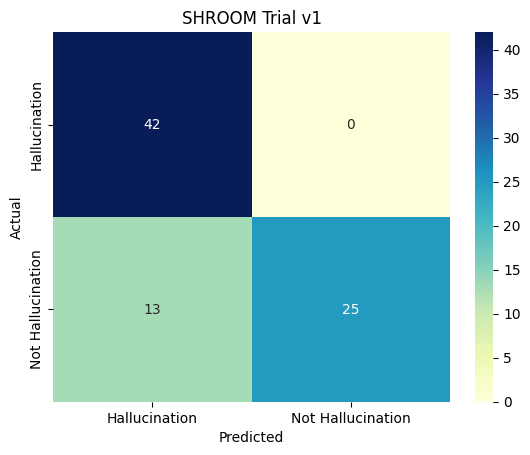

## False positives

hyp,ref,src,tgt,model,task,labels,label,p(Hallucination),rationale,predicted
(nautical) A halyard.,tgt,"Haul away , keeping strain on both parts of the halyard so that the pigstick remains vertical as it goes up and does n't foul the spreaders .",(nautical) A staff that carries a flag or pennant above the mast of a sailboat.,,DM,"['Hallucination', 'Not Hallucination', 'Not Hallucination']",Not Hallucination,0.333333,"The output can be considered a hallucination because it does not accurately define the term ""pigstick"". The target definition indicates that a pigstick is a staff that carries a flag or pennant above the mast of a sailboat, but the output generated by the language model defines it as a halyard, which is a different nautical term. This suggests that the model has not correctly understood or processed the input. On the other hand, the argument for the output not being a hallucination could be that the term ""halyard"" is related to the term ""pigstick"" in the context of sailing and nautical terminology. A halyard is a rope used for hoisting or lowering sails, flags, or yards, and a pigstick could be hoisted using a halyard. Therefore, the model may have inferred a connection between the two terms. However, the task is to provide a definition for the term ""pigstick"", not to provide a related term or concept. Therefore, the output is a hallucination because it does not accurately define the term ""pigstick"" as per the target definition.",Hallucination
"(Australia, New Zealand, colloquial) A hatfish.",tgt,"Noah did n't realize when he stayed on the job - he was then about 600 years old and built the ark and drove the animals in two by two , the hatfish and the kangaroo — — he did n't realize he was laying the foundation for an occupation for old men in New York , several years later .",(colloquial) Synonym of halibut,,DM,"['Hallucination', 'Not Hallucination', 'Not Hallucination']",Not Hallucination,0.333333,"The output can be considered a hallucination because it does not match the target definition. The target definition states that a ""hatfish"" is a colloquial synonym for halibut, while the output generated by the language model defines it as a term used in Australia and New Zealand, without any reference to it being a synonym for halibut. This discrepancy indicates that the output is incorrect and therefore a hallucination. On the other hand, the output could be considered not a hallucination because it does provide a definition for the term ""hatfish"". The output suggests that ""hatfish"" is a term used in Australia and New Zealand, which could be inferred from the context of the input, as it mentions animals like kangaroos, which are native to Australia. However, this inference is a stretch, as the input does not explicitly state that ""hatfish"" is a term used in these countries. In conclusion, the output is more likely to be a hallucination, as it does not match the target definition and the inference made to justify it not being a hallucination is quite weak. The language model should have generated a definition that aligns with the target, stating that ""hatfish"" is a colloquial synonym for halibut.",Hallucination
A device that simulates walking.,tgt,"During the late 1960s and early 1970s , it was also the site of the lunar 1⁄6 gravity walking simulator rig .","Used other than figuratively or idiomatically: see walking,‎ simulator.",,DM,"['Not Hallucination', 'Not Hallucination', 'Hallucination']",Not Hallucination,0.333333,"The output could be considered a hallucination because it does not provide a complete definition of the term ""walking simulator."" The term is used in the context of a lunar gravity rig, suggesting that it is a device specifically designed to simulate the experience of walking in a lunar environment, which has 1/6th of Earth's gravity. The output, however, only defines it as a device that simulates walking, without any reference to the lunar or reduced gravity context. This coul

In [46]:
datapoints = json.load(open('results_trial-v1_pro_and_con.json', 'r'))
datapoints = [ dp for dp in datapoints if "predicted" in dp ]
results = pd.DataFrame.from_records(datapoints)
cm = pycm.ConfusionMatrix(results["label"].tolist(), results["predicted"].tolist(), digit=2, classes=[ 'Hallucination', 'Not Hallucination' ])

display(Markdown(f'## Performance: N = {cm.POP["Hallucination"]}, ACC = {cm.ACC["Hallucination"]:.3f}, F1 macro = {cm.F1_Macro:.3f}, kappa = {cm.Kappa:.3f}'))
df_cm = pd.DataFrame(cm.matrix).T.fillna(0)
ax = sns.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")
ax.set_title("SHROOM Trial v1")
ax.set(xlabel='Predicted', ylabel='Actual')
plt.show()

def display_errors(results):
    fns = results[((results["label"] == 'Hallucination') & (results["predicted"] == 'Not Hallucination'))]
    if len(fns) > 0:
        fns_styler = fns.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown(f'## False negatives'))
        display(fns_styler)
    fps = results[((results["label"] == 'Not Hallucination') & (results["predicted"] == 'Hallucination'))]
    if len(fps) > 0:
        fps_styler = fps.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown(f'## False positives'))
        display(fps_styler)

display_errors(results)

In [47]:
results["predicted_p"] = results["predicted"].apply(lambda x: 0.0 if x == "Not Hallucination" else 1.0)
results[["p(Hallucination)", "predicted_p"]].corr(method='spearman',numeric_only=True)

,p(Hallucination),predicted_p
p(Hallucination),1.000000,0.767751
predicted_p,0.767751,1.000000
